# Problem statement:To predict whether a patient having stroke or not

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
st=pd.read_csv(r"C:\Users\MANGESH\Desktop\healthcare-dataset-stroke-data.csv")
st

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
st.shape

(5110, 12)

In [4]:
st.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [5]:
st.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
st.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#transformation categarical to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
st.gender=le.fit_transform(st.gender)
st.ever_married=le.fit_transform(st.ever_married)
st.work_type=le.fit_transform(st.work_type)
st.Residence_type=le.fit_transform(st.Residence_type)
st.smoking_status =le.fit_transform(st.smoking_status )
st.bmi=le.fit_transform(st.bmi)

In [9]:
st.bmi.value_counts()

418    201
160     41
157     38
149     37
140     37
      ... 
2        1
279      1
383      1
417      1
22       1
Name: bmi, Length: 419, dtype: int64

In [10]:
#missing value treatment
st.bmi=st.bmi.fillna("1")

In [11]:
stp=st.drop(["id"],axis=1)
stp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,239,1,1
1,0,61.0,0,0,1,3,0,202.21,418,2,1
2,1,80.0,0,1,1,2,0,105.92,198,2,1
3,0,49.0,0,0,1,2,1,171.23,217,3,1
4,0,79.0,1,0,1,3,0,174.12,113,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,418,2,0
5106,0,81.0,0,0,1,3,1,125.20,273,2,0
5107,0,35.0,0,0,1,3,0,82.99,179,2,0
5108,1,51.0,0,0,1,2,0,166.29,129,1,0


In [12]:
stp.drop_duplicates(inplace=True)

In [13]:
stp.shape

(5110, 11)

In [14]:
cr=stp.corr()
cr

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,0.001317,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.326959,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.181732,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.090682,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.309074,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.262838,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,0.006526,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.196912,0.063437,0.131945
bmi,0.001317,0.326959,0.181732,0.090682,0.309074,-0.262838,0.006526,0.196912,1.000000,0.192084,0.114154
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.192084,1.000000,0.028123


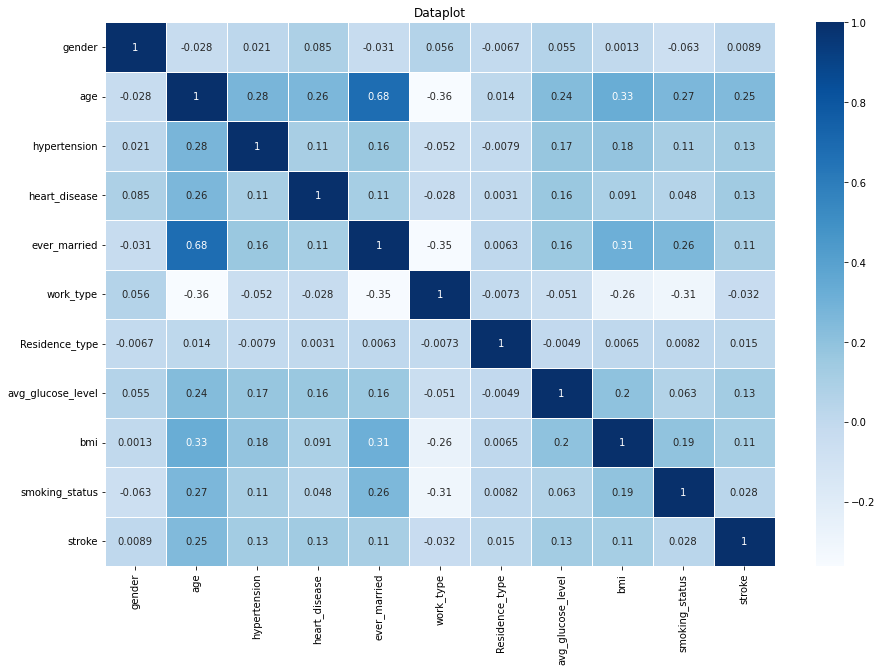

In [15]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(cr,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Dataplot")
plt.show()

# Data spliting into train and test

In [16]:
stp_x=stp.iloc[:,0:10]
stp_y=stp.iloc[:,-1]

In [17]:
stp_y.head(2)

0    1
1    1
Name: stroke, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(stp_x,stp_y,test_size=0.2,random_state=101)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4088, 10), (1022, 10), (4088,), (1022,))

# Machine learning base model

# LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [22]:
lm.fit(x_train,y_train)

LogisticRegression()

In [23]:
lm_pred=lm.predict(x_test)
lm_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
pred_value=lm.predict_proba(x_test)
pred_value

array([[0.99358401, 0.00641599],
       [0.98956287, 0.01043713],
       [0.83660961, 0.16339039],
       ...,
       [0.93629866, 0.06370134],
       [0.92125267, 0.07874733],
       [0.85265892, 0.14734108]])

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
m=confusion_matrix(lm_pred,y_test)
m

array([[966,  53],
       [  2,   1]], dtype=int64)

In [27]:
lm_ac=m.diagonal().sum()/m.sum()*100
lm_ac

94.6183953033268

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(lm_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1019
           1       0.02      0.33      0.04         3

    accuracy                           0.95      1022
   macro avg       0.51      0.64      0.50      1022
weighted avg       1.00      0.95      0.97      1022



# DECISION TREE

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [31]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
dt_pred=dt.predict(x_test)
dt_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [33]:
dt.feature_importances_

array([0.0408886 , 0.17723443, 0.01972325, 0.02121114, 0.01408492,
       0.04607416, 0.03885453, 0.35600563, 0.22377548, 0.06214785])

In [34]:
m1=confusion_matrix(dt_pred,y_test)
m1

array([[932,  40],
       [ 36,  14]], dtype=int64)

In [35]:
dt_ac1=m1.diagonal().sum()/m1.sum()*100
dt_ac1

92.56360078277886

In [36]:
print(classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.26      0.28      0.27        50

    accuracy                           0.93      1022
   macro avg       0.61      0.62      0.62      1022
weighted avg       0.93      0.93      0.93      1022



# RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [38]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
rf_pred=rf.predict(x_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
m2=confusion_matrix(rf_pred,y_test)
m2

array([[968,  50],
       [  0,   4]], dtype=int64)

In [41]:
ac2=m2.diagonal().sum()/m2.sum()*100
ac2

95.10763209393346

In [42]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1018
           1       0.07      1.00      0.14         4

    accuracy                           0.95      1022
   macro avg       0.54      0.98      0.56      1022
weighted avg       1.00      0.95      0.97      1022



# BOOSTING

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
ad=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [45]:
ad.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [46]:
ad_pred=ad.predict(x_test)
ad_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [47]:
m3=confusion_matrix(ad_pred,y_test)
m3

array([[933,  43],
       [ 35,  11]], dtype=int64)

In [48]:
ac3=m3.diagonal().sum()/m3.sum()*100
ac3

92.3679060665362

In [49]:
print(classification_report(ad_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       976
           1       0.20      0.24      0.22        46

    accuracy                           0.92      1022
   macro avg       0.58      0.60      0.59      1022
weighted avg       0.93      0.92      0.93      1022



# XG BOOST

In [50]:
from xgboost import XGBClassifier
xg= XGBClassifier()

In [51]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [52]:
xg_pred=xg.predict(x_test)
xg_pred

array([0, 0, 0, ..., 0, 1, 0])

In [53]:
m4=confusion_matrix(xg_pred,y_test)
m4

array([[960,  48],
       [  8,   6]], dtype=int64)

In [54]:
ac4=m4.diagonal().sum()/m4.sum()*100
ac4

94.52054794520548

In [55]:
print(classification_report(xg_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1008
           1       0.11      0.43      0.18        14

    accuracy                           0.95      1022
   macro avg       0.55      0.69      0.57      1022
weighted avg       0.98      0.95      0.96      1022



# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=40)

In [57]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [58]:
kn_pred=kn.predict(x_test)
kn_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
m5=confusion_matrix(kn_pred,y_test)
m5

array([[968,  54],
       [  0,   0]], dtype=int64)

In [60]:
ac5=m5.diagonal().sum()/m5.sum()*100
ac5

94.71624266144813

In [61]:
print(classification_report(kn_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1022
   macro avg       0.50      0.47      0.49      1022
weighted avg       1.00      0.95      0.97      1022



In [62]:
l=list()

In [63]:
for i in range (1,50):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(x_train,y_train)
    kn_pred=kn.predict(x_test)
    c=confusion_matrix(kn_pred,y_test)
    acc=c.diagonal().sum()/c.sum()*100
    l.append(acc)

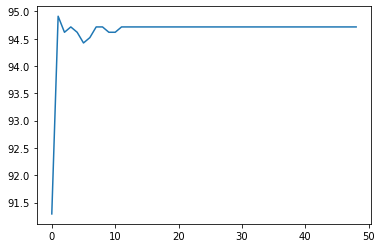

In [64]:
p=plt.plot(l)

# SVM

In [65]:
from sklearn.svm import SVC
svc=SVC()

In [66]:
svc.fit(x_train,y_train)

SVC()

In [67]:
svc_pred=svc.predict(x_test)
svc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
m6=confusion_matrix(svc_pred,y_test)
m6

array([[968,  54],
       [  0,   0]], dtype=int64)

In [69]:
ac6=m6.diagonal().sum()/m6.sum()*100
ac6

94.71624266144813

In [70]:
print(classification_report(svc_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1022
   macro avg       0.50      0.47      0.49      1022
weighted avg       1.00      0.95      0.97      1022



# NAIVE BAYES

In [71]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [72]:
nb.fit(x_train,y_train)

MultinomialNB()

In [73]:
nb_pred=nb.predict(x_test)
nb_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [74]:
m7=confusion_matrix(nb_pred,y_test)
m7

array([[771,  30],
       [197,  24]], dtype=int64)

In [75]:
ac7=m7.diagonal().sum()/m7.sum()*100
ac7

77.78864970645792

In [76]:
print(classification_report(nb_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       801
           1       0.44      0.11      0.17       221

    accuracy                           0.78      1022
   macro avg       0.62      0.54      0.52      1022
weighted avg       0.72      0.78      0.72      1022



In [77]:
#OUTLIERS

<AxesSubplot:>

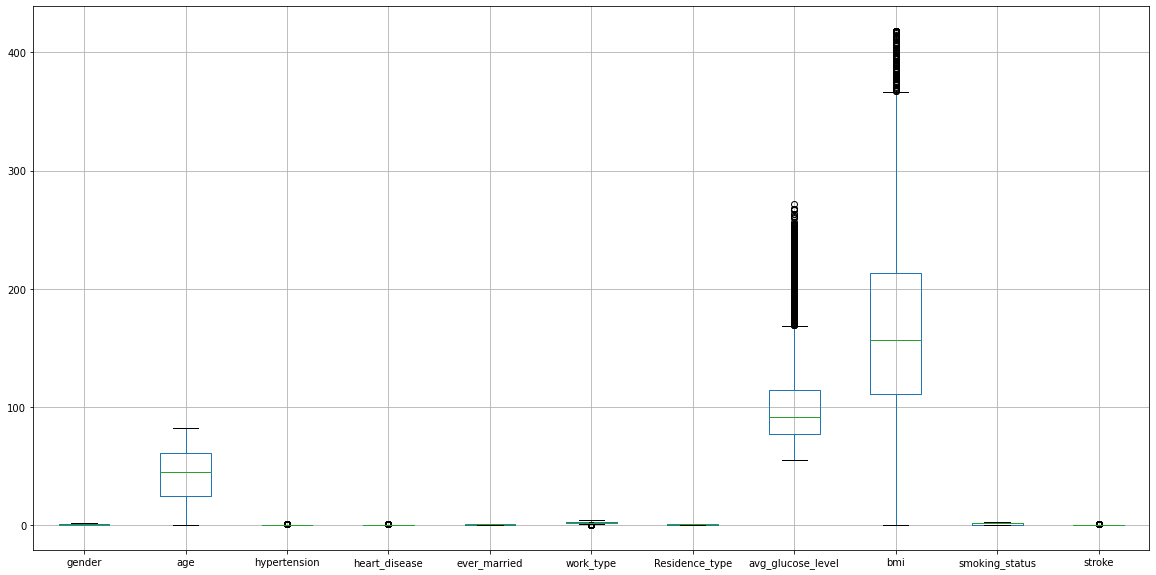

In [78]:
stp.boxplot(figsize=(20,10))

<AxesSubplot:>

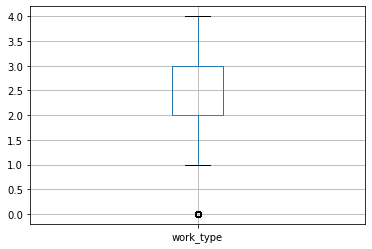

In [79]:
stp.boxplot(column="work_type")

<AxesSubplot:>

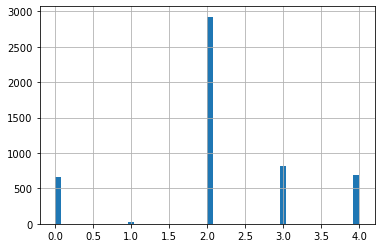

In [80]:
stp.work_type.hist(bins=50)

<AxesSubplot:xlabel='work_type', ylabel='Density'>

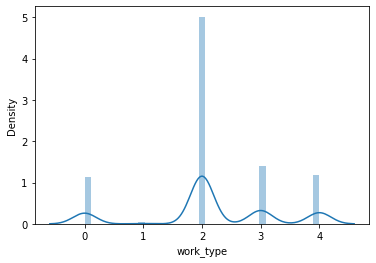

In [81]:
sns.distplot(stp["work_type"])

In [82]:
stp.work_type.describe()

count    5110.000000
mean        2.167710
std         1.090293
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: work_type, dtype: float64

In [83]:
iqr2=stp.work_type.quantile(0.75)-stp.work_type.quantile(0.25)
iqr2

1.0

In [84]:
u3=stp["work_type"].quantile(0.75)+3*iqr2
print(u3)

6.0


In [85]:
stp.loc[stp["work_type"]>6,"work_type"]=6

<AxesSubplot:>

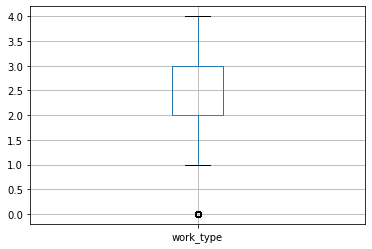

In [86]:
stp.boxplot(column="work_type")

<AxesSubplot:>

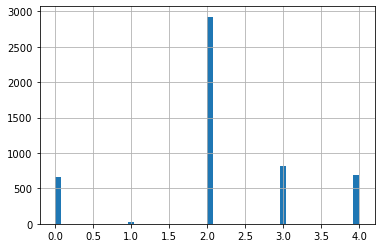

In [87]:
stp.work_type.hist(bins=50)

<AxesSubplot:>

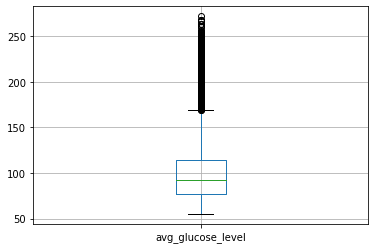

In [88]:
stp.boxplot(column="avg_glucose_level")

<AxesSubplot:>

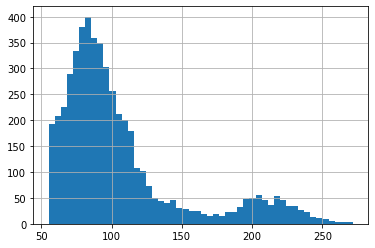

In [89]:
stp.avg_glucose_level.hist(bins=50)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

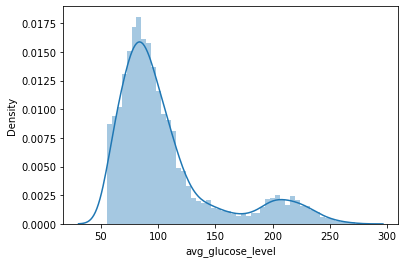

In [90]:
sns.distplot(stp["avg_glucose_level"])

In [91]:
stp.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [92]:
iqr3=stp.avg_glucose_level.quantile(0.75)-stp.avg_glucose_level.quantile(0.25)
iqr3

36.845

In [93]:
u2=stp["avg_glucose_level"].quantile(0.75)+3*iqr3
print(u2)

224.625


In [94]:
stp.loc[stp["avg_glucose_level"]>224,"avg_glucose_level"]=224

<AxesSubplot:>

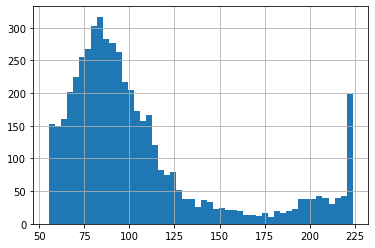

In [95]:
stp.avg_glucose_level.hist(bins=50)

<AxesSubplot:>

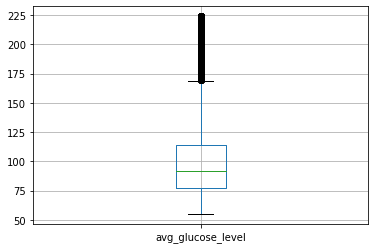

In [96]:
stp.boxplot(column="avg_glucose_level")

<AxesSubplot:>

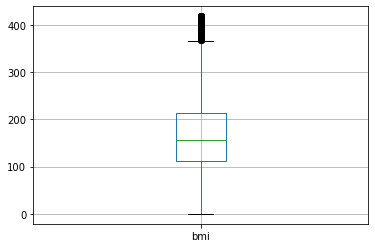

In [97]:
stp.boxplot(column="bmi")

<AxesSubplot:>

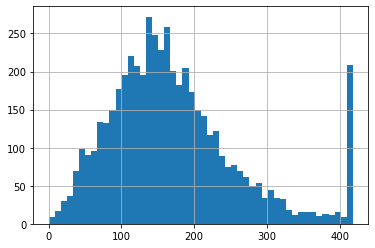

In [98]:
stp.bmi.hist(bins=50)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

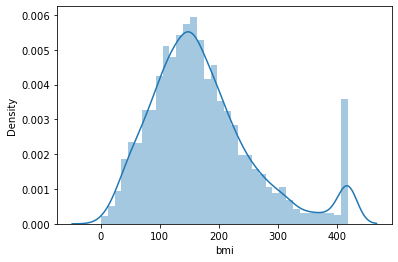

In [99]:
sns.distplot(stp["bmi"])

In [100]:
stp.bmi.describe()

count    5110.000000
mean      171.194521
std        88.961724
min         0.000000
25%       111.000000
50%       157.000000
75%       213.000000
max       418.000000
Name: bmi, dtype: float64

In [101]:
iqr4=stp.bmi.quantile(0.75)-stp.bmi.quantile(0.25)
iqr4

102.0

In [102]:
u4=stp["bmi"].quantile(0.75)+3*iqr4
print(u4)

519.0


In [103]:
stp.loc[stp["bmi"]>519,"bmi"]=519

<AxesSubplot:>

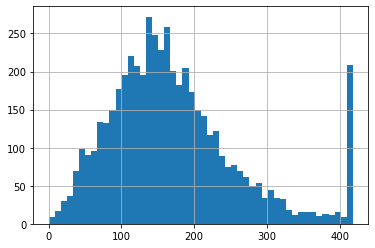

In [104]:
stp.bmi.hist(bins=50)

<AxesSubplot:>

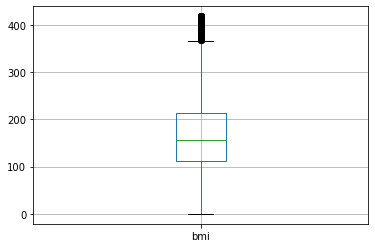

In [105]:
stp.boxplot(column="bmi")

# Class Imbalance Technique

In [106]:
st.stroke.value_counts()                

0    4861
1     249
Name: stroke, dtype: int64

# synthetic minority oversampling technique(SMOTE)

In [107]:
stp_x=stp.iloc[:,0:-1]
stp_y=stp.iloc[:,-1]

In [108]:
stp_x.shape,stp_y.shape

((5110, 10), (5110,))

In [109]:
stp["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [110]:
from imblearn.over_sampling import SMOTE

In [111]:
sm=SMOTE()

In [112]:
x_smote,y_smote=sm.fit_resample(stp_x,stp_y)

In [113]:
x_smote.shape,y_smote.shape

((9722, 10), (9722,))

In [114]:
y_smote.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [115]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=100)

In [116]:
x3_train.shape,x3_test.shape,y3_train.shape,y3_test.shape

((7777, 10), (1945, 10), (7777,), (1945,))

# Logistic regression

In [117]:
lm.fit(x3_train,y3_train)

LogisticRegression()

In [118]:
pred_lm2=lm.predict(x3_test)
pred_lm2

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [119]:
c_11=confusion_matrix(pred_lm2,y3_test)
c_11


array([[771, 164],
       [206, 804]], dtype=int64)

In [120]:
acc_11=c_11.diagonal().sum()/c_11.sum()*100
acc_11

80.97686375321337

In [121]:
print(classification_report(pred_lm2,y3_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       935
           1       0.83      0.80      0.81      1010

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945



# Decision Tree

In [122]:
dt.fit(x3_train,y3_train)

DecisionTreeClassifier()

In [123]:
pre_dt=dt.predict(x3_test)
pre_dt

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [124]:
c_12=confusion_matrix(pre_dt,y3_test)
c_12

array([[883,  75],
       [ 94, 893]], dtype=int64)

In [125]:
acc_12=c_12.diagonal().sum()/c_12.sum()*100
acc_12

91.31105398457584

In [126]:
print(classification_report(pre_dt,y3_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       958
           1       0.92      0.90      0.91       987

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



# Random Forest

In [127]:
rf.fit(x3_train,y3_train)

RandomForestClassifier()

In [128]:
pre_rf=rf.predict(x3_test)
pre_rf

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [129]:
c_13=confusion_matrix(pre_rf,y3_test)
c_13

array([[900,  37],
       [ 77, 931]], dtype=int64)

In [130]:
acc_13=c_13.diagonal().sum()/c_13.sum()*100
acc_13

94.1388174807198

In [131]:
print(classification_report(pre_rf,y3_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       937
           1       0.96      0.92      0.94      1008

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



# Boosting

In [132]:
ad.fit(x3_train,y3_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [133]:
add_pred=ad.predict(x3_test)
add_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [134]:
c_14=confusion_matrix(add_pred,y3_test)
c_14

array([[879,  77],
       [ 98, 891]], dtype=int64)

In [135]:
acc_14=c_14.diagonal().sum()/c_14.sum()*100
acc_14

91.00257069408741

In [136]:
print(classification_report(add_pred,y3_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       956
           1       0.92      0.90      0.91       989

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



# XGBoost

In [137]:
xg.fit(x3_train,y3_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [138]:
xg_pred1=xg.predict(x3_test)
xg_pred1

array([0, 0, 1, ..., 0, 0, 0])

In [139]:
c_15=confusion_matrix(xg_pred1,y3_test)
c_15

array([[941,  36],
       [ 36, 932]], dtype=int64)

In [140]:
acc_15=c_15.diagonal().sum()/c_15.sum()*100
acc_15

96.29820051413883

In [141]:
print(classification_report(xg_pred1,y3_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       977
           1       0.96      0.96      0.96       968

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



# KNN

In [142]:
kn.fit(x3_train,y3_train)

KNeighborsClassifier(n_neighbors=49)

In [143]:
kn_pred1=kn.predict(x3_test)
kn_pred1

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [144]:
c_16=confusion_matrix(kn_pred1,y3_test)
c_16

array([[672,  51],
       [305, 917]], dtype=int64)

In [145]:
acc_16=c_16.diagonal().sum()/c_16.sum()*100
acc_16

81.69665809768637

In [146]:
print(classification_report(kn_pred1,y3_test))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79       723
           1       0.95      0.75      0.84      1222

    accuracy                           0.82      1945
   macro avg       0.82      0.84      0.81      1945
weighted avg       0.85      0.82      0.82      1945



In [147]:
for i in range (1,50):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(x3_train,y3_train)
    kn_pred1=kn.predict(x3_test)
    c=confusion_matrix(kn_pred1,y3_test)
    acc=c.diagonal().sum()/c.sum()*100
    l.append(acc)

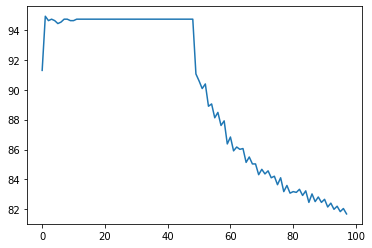

In [148]:
p=plt.plot(l)

# SVM

In [149]:
svc.fit(x3_train,y3_train)

SVC()

In [150]:
svc_pred1=svc.predict(x3_test)
svc_pred1

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [151]:
c_17=confusion_matrix(svc_pred1,y3_test)
c_17

array([[712, 181],
       [265, 787]], dtype=int64)

In [152]:
acc_17=c_17.diagonal().sum()/c_17.sum()*100
acc_17

77.0694087403599

In [153]:
print(classification_report(svc_pred1,y3_test))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       893
           1       0.81      0.75      0.78      1052

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.77      1945
weighted avg       0.77      0.77      0.77      1945



# NAIVE BAYES

In [154]:
nb.fit(x3_train,y3_train)

MultinomialNB()

In [155]:
nb_pred1=nb.predict(x3_test)
nb_pred1

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [156]:
c_18=confusion_matrix(nb_pred1,y3_test)
c_18

array([[644, 296],
       [333, 672]], dtype=int64)

In [157]:
acc_18=c_18.diagonal().sum()/c_18.sum()*100
acc_18

67.66066838046272

In [158]:
print(classification_report(nb_pred1,y3_test))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       940
           1       0.69      0.67      0.68      1005

    accuracy                           0.68      1945
   macro avg       0.68      0.68      0.68      1945
weighted avg       0.68      0.68      0.68      1945



# Result : Decision tree and Adaboostclassifier are best suited model for stroke prediction datatset 